In [1]:
import torch

In [2]:
inverse_map = torch.load("/root/inverse_maps/w1_l0_etgt0_ecandidates1,2,3,4,5,6,7/inverse_map.pt")

In [3]:
inverse_map.shape

torch.Size([14336, 100352])

In [5]:
u, s, vh = torch.svd(inverse_map.float())

(0.0, 1.0)

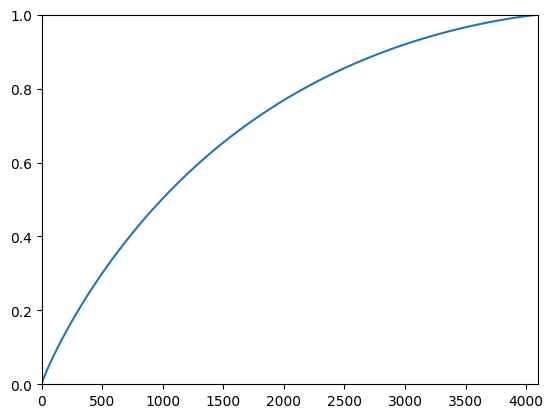

In [11]:
# plot singular values
import matplotlib.pyplot as plt
sq = s**2
ve = sq / sq.sum()
ve_sorted = torch.sort(ve, descending=True).values
ve_cumsum = torch.cumsum(ve_sorted, 0)

plt.plot(ve_cumsum.cpu().numpy())
plt.xlim(0, 4096)
plt.ylim(0, 1)

In [17]:
# plot weight norm distribution
w_norm = torch.abs(inverse_map)

<Axes: ylabel='Count'>

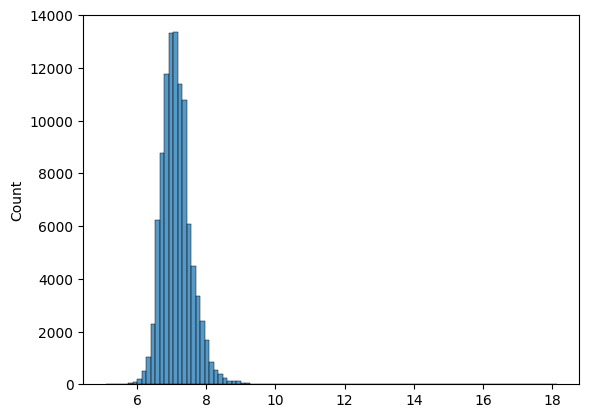

In [20]:
# plot norm distribution
import seaborn as sns
sns.histplot(w_norm.float().cpu().numpy(), bins=100)